# California Wildfire Prediction

This project aims to analyze California weather and wildfire data in order to effectively predict wildfires.

Our dataset can be found [here](https://zenodo.org/records/14712845), and contains variables including time series, precipitation, wind, and other features.

## Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd

# Load Dataset
data = pd.read_csv('CA_Weather_Fire_Dataset_1984-2025.csv')

In [ ]:
# Column Names and Non-null Counts
print("-----Column Names and Non-null Counts-----")
data.info()

-----Column Names and Non-null Counts-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14988 entries, 0 to 14987
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   14988 non-null  object 
 1   PRECIPITATION          14987 non-null  float64
 2   MAX_TEMP               14987 non-null  float64
 3   MIN_TEMP               14987 non-null  float64
 4   AVG_WIND_SPEED         14976 non-null  float64
 5   FIRE_START_DAY         14988 non-null  bool   
 6   YEAR                   14988 non-null  int64  
 7   TEMP_RANGE             14987 non-null  float64
 8   WIND_TEMP_RATIO        14976 non-null  float64
 9   MONTH                  14988 non-null  int64  
 10  SEASON                 14988 non-null  object 
 11  LAGGED_PRECIPITATION   14988 non-null  float64
 12  LAGGED_AVG_WIND_SPEED  14988 non-null  float64
 13  DAY_OF_YEAR            14988 non-null  int64  
dtypes: bool(1),

From the general feature information, there are some NULL values in the dataset. Considering the small number of NULL occurrences, dropping the rows that contain NULL will suffice to clean the data.


-----Summary Statistics of Numeric Columns-----


,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,TEMP_RANGE,WIND_TEMP_RATIO,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED
count,14987.000000,14987.000000,14987.000000,14976.000000,14987.000000,14976.000000,14988.000000,14988.000000
mean,0.032315,70.534997,56.494095,7.435098,14.040902,0.107019,0.226188,7.434198
std,0.179544,7.263447,6.767685,2.129985,5.995327,0.035630,0.648705,1.387849
min,0.000000,50.000000,33.000000,1.790000,2.000000,0.023553,0.000000,3.227143
25%,0.000000,65.000000,51.000000,6.040000,10.000000,0.085238,0.000000,6.518571
50%,0.000000,70.000000,57.000000,7.160000,12.000000,0.102222,0.000000,7.478571
75%,0.000000,75.000000,62.000000,8.500000,17.000000,0.120462,0.060000,8.278571
max,4.530000,106.000000,77.000000,26.170000,41.000000,0.459123,8.180000,13.932857



-----Distribution of Values in Each Numeric Feature-----


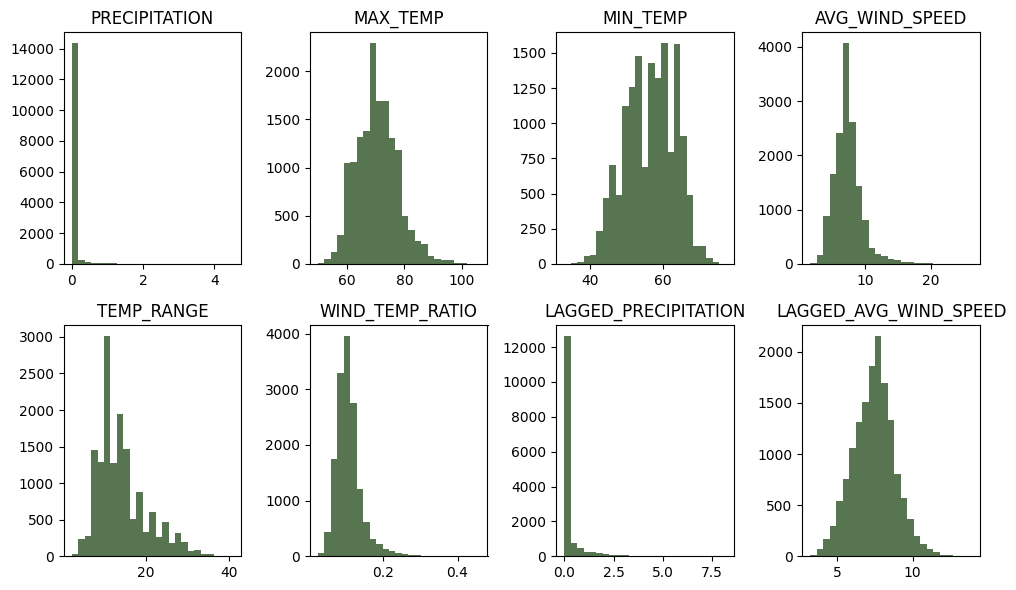

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors

# Summary Statistics of Numeric Columns
print("\n-----Summary Statistics of Numeric Columns-----")
display(data.describe().drop(['YEAR', 'MONTH', 'DAY_OF_YEAR'], axis=1))

# Plot of distribution for each numeric variable for informal normality checks
print("\n-----Distribution of Values in Each Numeric Feature-----")
numeric = data.select_dtypes(include=['int64', 'float64']).drop(columns=['YEAR', 'MONTH', 'DAY_OF_YEAR'], axis=1)
# Plot distribution of each numeric feature
plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric.columns):  # Iterate over all numeric features
    plt.subplot(2, 4, i + 1)
    plt.hist(data[col], bins=25, color='#577550')
    plt.title(col)
plt.tight_layout()
plt.show()

The distributions of the features are mostly non-normal. To adjust this in model selection/performance, models that can fit non-linear relationships such as trees or neural networks will be preferred.

-----Correlation Heatmap for Numeric Features-----


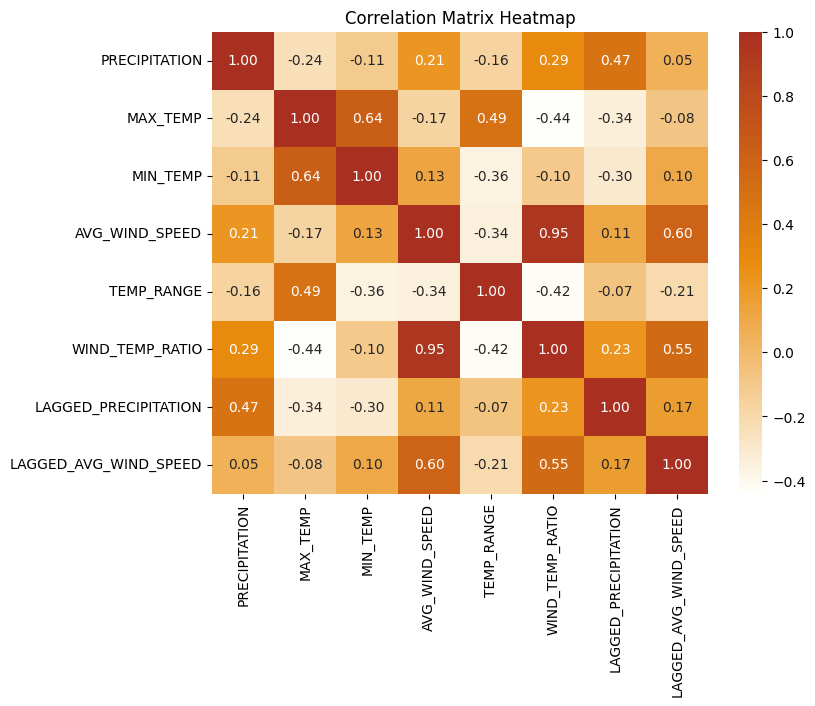

In [ ]:
# Correlation Matrix
print("-----Correlation Heatmap for Numeric Features-----")
plt.figure(figsize=(8, 6))
colors = ["#fefffa", "#e98c0e", "#a93021"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(numeric.corr(), cmap=cmap, annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

From the correlation matrix between the numeric features in the dataset, there is extreme correlation between WIND_TEMP_RATIO and AVG_WIND_SPEED. There is also moderate correlation between features measuring wind, precipitation, and temperature. This is expected, since the features are measuring the same variable type. To prevent the model from underperforming and skewing feature importance, some of these variables may have to be removed from the model.

In [ ]:
# Class Distribution of Target
print('\n-----Class Distribution of Fire Start Day (Binary)-----')
print(data['FIRE_START_DAY'].value_counts() / len(data))


-----Class Distribution of Fire Start Day (Binary)-----
FIRE_START_DAY
False    0.668335
True     0.331665
Name: count, dtype: float64


Looking at the class distribution of the target (0
= No Fire, 1 = Fire Start Day), the dataset contains many 0s over 1s in an approximate 2:1 ratio. Since the dataset is imbalanced, it may be beneficial to use oversampling via SMOTE to increase the model performance, especially since the goal is to correctly detect occurrences in the minority class (fire starting).

In [ ]:
# Sample from Dataset
print("\n-----Random Sample of 5 Rows from Dataset-----")
display(data.sample(5))


-----Random Sample of 5 Rows from Dataset-----


,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR
8561,2007-06-10,0.0,68.0,60.0,6.71,True,2007,8.0,0.098676,6,Summer,0.00,7.221429,161
12339,2017-10-13,0.0,72.0,60.0,6.71,False,2017,12.0,0.093194,10,Fall,0.00,6.871429,286
10450,2012-08-11,0.0,82.0,69.0,6.04,True,2012,13.0,0.073659,8,Summer,0.00,6.647143,224
8254,2006-08-07,0.0,78.0,66.0,8.72,True,2006,12.0,0.111795,8,Summer,0.01,9.328571,219
10966,2014-01-09,0.0,60.0,50.0,5.59,False,2014,10.0,0.093167,1,Winter,0.00,4.090000,9


## Data Preprocessing

To preprocess the dataset for the model, NULL values were removed, and categorical variables (SEASON) were transformed into numeric feature. In addition, the data was resampled using SMOTE to mitigate the class imbalance.

The numeric features were scaled using Standard Scaler to ensure that feature importance is accurately captured in the model.

An 80:20 split was used for the dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Drop NA rows
data.dropna(axis=0, inplace=True)

# Encode categorical variable
label_encoder = LabelEncoder()
data['SEASON'] = label_encoder.fit_transform(data['SEASON'])
print("Season Encoded Mapping:")
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))) # Print mapping

# Select features and target
features = ['PRECIPITATION', 'MAX_TEMP', 'MIN_TEMP', 'AVG_WIND_SPEED',
            'TEMP_RANGE', 'WIND_TEMP_RATIO', 'MONTH', 'SEASON',
            'LAGGED_PRECIPITATION', 'LAGGED_AVG_WIND_SPEED', 'DAY_OF_YEAR']
X = data[features]
y = data['FIRE_START_DAY']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split 80:20 w/ stratified data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Scale features into dataframe
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Season Encoded Mapping:
{'Fall': 0, 'Spring': 1, 'Summer': 2, 'Winter': 3}


## Model Selection

Since we are dealing with a binary classification problem, tree-based models like Gradient Boosting and Random Forest are effective. Wildfires are influenced by complex interactions between multiple factors, and  while logistic regression models can struggle to model non-linear and complex relationships, decision-based trees are particularly suited for capturing these non-linear relationships.


Gradient Boosting methods sequentially build trees to correct previous decision errors, making them more powerful than single Decision Trees. Random Forests average multiple trees which reduces variance, but may not be as optimized as Gradient Boosting for classification.

Below, a Random Forest and X-Gradient Boost model are implemented and compared to select the best model for the dataset.

### Random Forest vs XG Boost

It is critical that the wildfire prediction model does not miss a fire when it occurs. This means that a high recall will be one of our main evaluation metrics, which ensures that false-negatives (predictions that a fire will not occur when it actually will) are minimized. Other metrics include accuracy, precision, F1 score, and cross-validation score.

To further address any class imbalance concerns, a stratified k-fold cross validation was implemented to ensure that the folds are balanced while evaluating a model.  These stratified cross validation scores will focus on recall, and the model with the higher cross validation score will generalize better to unseen data.

A combination of cross validation score and recall will be used to determine the best model to proceed with.


#### Initial Model Training

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost Model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

#### Feature Importance

To understand the weights placed on certain features, the feature importances for each model are printed below.

In [ ]:
# Feature Importances
feature_importances_rf = pd.Series(rf.feature_importances_, index=features)
print("-Random Forest Feature Importances-")
print(feature_importances_rf.sort_values(ascending=False))

feature_importances_xgb = pd.Series(xgb.feature_importances_, index=features)
print("\n---XGBoost Feature Importances---")
print(feature_importances_xgb.sort_values(ascending=False))

-Random Forest Feature Importances-
MIN_TEMP                 0.194156
DAY_OF_YEAR              0.167249
MAX_TEMP                 0.120429
LAGGED_AVG_WIND_SPEED    0.115957
WIND_TEMP_RATIO          0.094128
AVG_WIND_SPEED           0.080638
TEMP_RANGE               0.076692
MONTH                    0.058044
LAGGED_PRECIPITATION     0.048148
SEASON                   0.036620
PRECIPITATION            0.007938
dtype: float64

---XGBoost Feature Importances---
MIN_TEMP                 0.362148
LAGGED_PRECIPITATION     0.115357
MAX_TEMP                 0.084123
DAY_OF_YEAR              0.082409
AVG_WIND_SPEED           0.078700
TEMP_RANGE               0.074582
SEASON                   0.068540
LAGGED_AVG_WIND_SPEED    0.039601
WIND_TEMP_RATIO          0.036496
MONTH                    0.031692
PRECIPITATION            0.026352
dtype: float32


#### Model Evaluation

--- Random Forest Performance ---
Accuracy: 0.8166
Precision: 0.8038
Recall: 0.8376
F1 Score: 0.8204

               precision    recall  f1-score   support

       False       0.83      0.80      0.81      2001
        True       0.80      0.84      0.82      2001

    accuracy                           0.82      4002
   macro avg       0.82      0.82      0.82      4002
weighted avg       0.82      0.82      0.82      4002


Confusion Matrix:



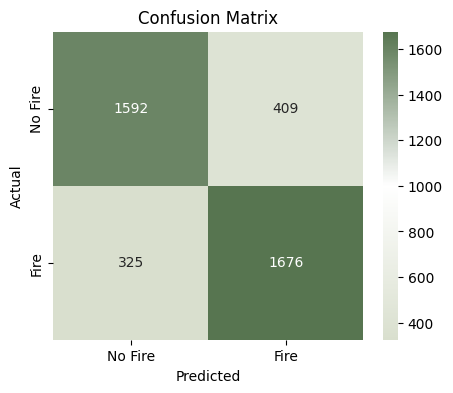



--- XGBoost Performance ---
Accuracy: 0.8136
Precision: 0.8018
Recall: 0.8331
F1 Score: 0.8172

               precision    recall  f1-score   support

       False       0.83      0.79      0.81      2001
        True       0.80      0.83      0.82      2001

    accuracy                           0.81      4002
   macro avg       0.81      0.81      0.81      4002
weighted avg       0.81      0.81      0.81      4002


Confusion Matrix:



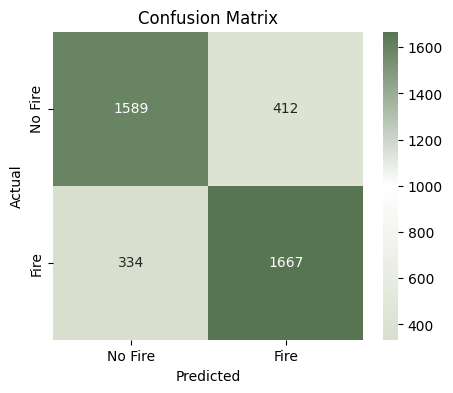

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Function to Plot Confusion Matrix
def plot_confusion_matrix(cm):
  colors = ["#d9dfce", "white","#577550"]
  cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
  plt.figure(figsize=(5,4))
  sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=["Fire", "Fire"], yticklabels=["No Fire", "Fire"])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

# Model Evaluation Function
def evaluate_model(model_name, y_true, y_pred):
    print(f"{model_name} Performance ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print("\n", classification_report(y_true, y_pred))
    print("\nConfusion Matrix:\n")
    plot_confusion_matrix(confusion_matrix(y_true, y_pred))
    print("\n")


evaluate_model("--- Random Forest", y_test, y_pred_rf)
evaluate_model("--- XGBoost", y_test, y_pred_xgb)

#### Cross-Validation Scoring

In [ ]:
from sklearn.model_selection import StratifiedKFold

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_rf = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
cross_val_xgb = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='recall')

print(f"Random Forest Stratified K-Fold Cross Validation Score: {np.mean(cross_val_rf):.4f}")
print(f"XG Boost Stratified K-Fold Cross Validation Score: {np.mean(cross_val_xgb):.4f}")

Random Forest Stratified K-Fold Cross Validation Score: 0.8287
XG Boost Stratified K-Fold Cross Validation Score: 0.8246


From the model evaluations, the Random Forest and XGB model perform very similarly, with Random Forest meagerly outperforming the XGB model. However, when observing the cross-validation scores, the XGB model scores slightly higher than Random Forest, which indicates that XGB fits the data slightly better to the data compared to Random Forest.

Based on the cross-validation scores, we should proceed with the XGBoost model. Even though the random forest model performs slightly better than the XGBoost model, the XGB model can be fine-tuned more effectively due to the number of hyperparameters that can be adjusted in the model.

## Optimizing Model Performance

#### Precision-Recall Tradeoff

Because the wildfire prediction model values recall over precision, there will be an expected decrease in precision (false-positives) as recall in optimized and increased. This plot demonstrates the tradeoff, and how fine-tuning the model will also involve balancing these aspects.

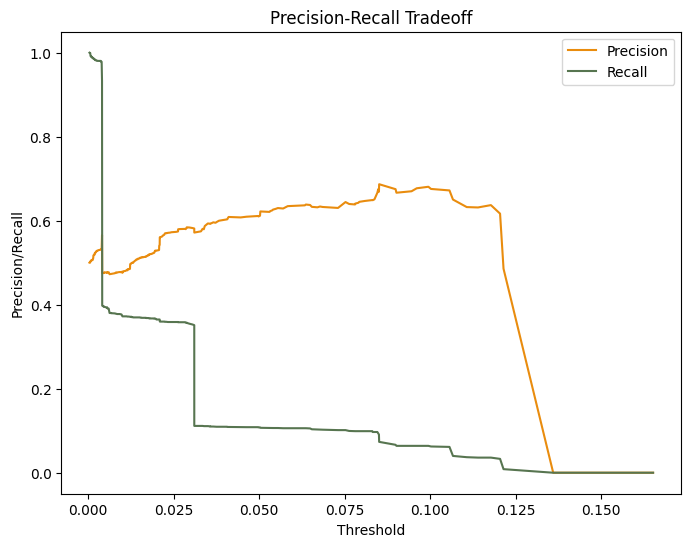

In [ ]:
from sklearn.metrics import precision_recall_curve
# Precision-Recall Curve
y_probs_xgb = xgb.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs_xgb)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], color= "#e98c0e", label="Precision")
plt.plot(thresholds, recalls[:-1], color = "#577550", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Tradeoff")
plt.legend(loc="best")
plt.show()

#### Improved Feature Selection

From the correlation heatmap matrix from the EDA, WIND_TEMP_RATIO and MAX_TEMP had correlation scores >.50 with one or more features. Multicollinearity can affect model performance, especially in its feature importance for tree performance.

Removing these features should improve model performance and prevent inaccurate feature importance.

In [ ]:
# Select features and target (removing variables w/ highest correlations)
features = ['PRECIPITATION', 'MIN_TEMP', 'AVG_WIND_SPEED', 'TEMP_RANGE',
            'MONTH', 'SEASON', 'LAGGED_PRECIPITATION', 'DAY_OF_YEAR',
            'LAGGED_AVG_WIND_SPEED'] # Removed WIND_TEMP_RATIO, MAX_TEMP
X = data[features]
y = data['FIRE_START_DAY']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Re-split data to training-test sets 80:20 w/ stratified data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Scale features into dataframe
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Fine-Tuning Hyperparameters

To fine-tune the model hyperparameters, randomized search CV will be utilized to select the best hyperparameters to optimize recall, with additional importance to precision and accuracy.

To optimize recall, false-negatives are penalized more, and shrinkage is applied to deal with feature importance in the model's decision-making. The number of layers, subsets, and children in the model were adjusted as well to increase the depth of learning the model can achieve.

Interaction between features was also considered, and interaction subsets were provided to the model (based of domain knowledge) to have the model explore the interactions during training. If interaction does not contribute to the model, None is also provided as an option to remove it.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define feature interaction constraints
interaction_constraints = [
    ["AVG_WIND_SPEED", "MIN_TEMP"],  # Temperature & wind speed interaction
    ["LAGGED_PRECIPITATION", "SEASON"],  # Rainfall patterns per season
    ["LAGGED_PRECIPITATION", "LAGGED_AVG_WIND_SPEED"],  # Past weather trends
    ["TEMP_RANGE", "AVG_WIND_SPEED"]  # Derived meteorological relationships
]

# XGBoost Hyperparameter Tuning
xgb = XGBClassifier(eval_metric='logloss', booster='gbtree', random_state=42)
xgb_params = {
    'n_estimators': [100, 150, 200, 250], # Number of trees
    'max_depth': [3, 6, 10, 12], # Number of layers
    'learning_rate': [0.01, 0.1, 0.05, 0.2], # Learning rate
    'subsample': [0.8, 1.0, 0.5, 0.65], # Subsampling proportions
    'colsample_bytree': [0.8, 1.0, 0.5, 0.65], # Column sampling proportions
    'min_child_weight': [1, 3, 5, 7], # Weights for leaves
    'gamma': [0, 0.1, 0.2, 0.3], # Regularization
    'reg_lambda': [0.1, 1, 10], # Regularization L2 parameter
    'reg_alpha': [0, 0.1, 1, 10], # Regularization L1 parameter
    'scale_pos_weight': [1, 1.5, 1.75, 1.85],  # Adjust for class imbalance, favor wildfire cases
    'interaction_constraints': [interaction_constraints, None] # Interaction Effects
}

xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=10, cv=5, scoring=['recall', 'precision','accuracy'], refit='recall', n_jobs=-1, random_state=42)
xgb_search.fit(X_train_scaled, y_train)
best_xgb = xgb_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)


In [ ]:
# Best Model Hyperparameters
print(best_xgb.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.65, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 0.2, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': [['AVG_WIND_SPEED', 'MIN_TEMP'], ['LAGGED_PRECIPITATION', 'SEASON'], ['LAGGED_PRECIPITATION', 'LAGGED_AVG_WIND_SPEED'], ['TEMP_RANGE', 'AVG_WIND_SPEED']], 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 3, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': None, 'scale_pos_weight': 1.85, 'subsample': 0.5, 'tree_method': None, 'valida

---Fine-Tuned XGBoost Performance ---
Accuracy: 0.7924
Precision: 0.7407
Recall: 0.8996
F1 Score: 0.8125

               precision    recall  f1-score   support

       False       0.87      0.69      0.77      2001
        True       0.74      0.90      0.81      2001

    accuracy                           0.79      4002
   macro avg       0.81      0.79      0.79      4002
weighted avg       0.81      0.79      0.79      4002


Confusion Matrix:



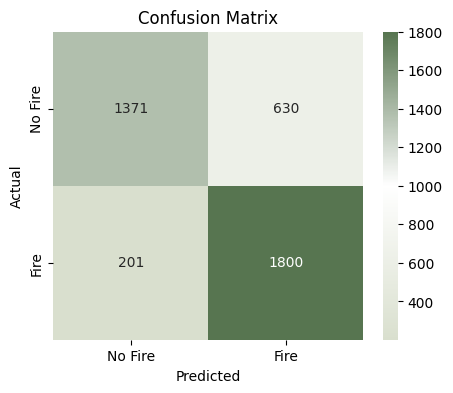



Cross Validation Score: 0.8926


In [ ]:
# Model Evaluation
evaluate_model("---Fine-Tuned XGBoost", y_test, y_pred_xgb)

cross_val_xgb = cross_val_score(best_xgb, X_train, y_train, cv=kf, scoring='recall')
print(f"Cross Validation Score: {np.mean(cross_val_xgb):.4f}")

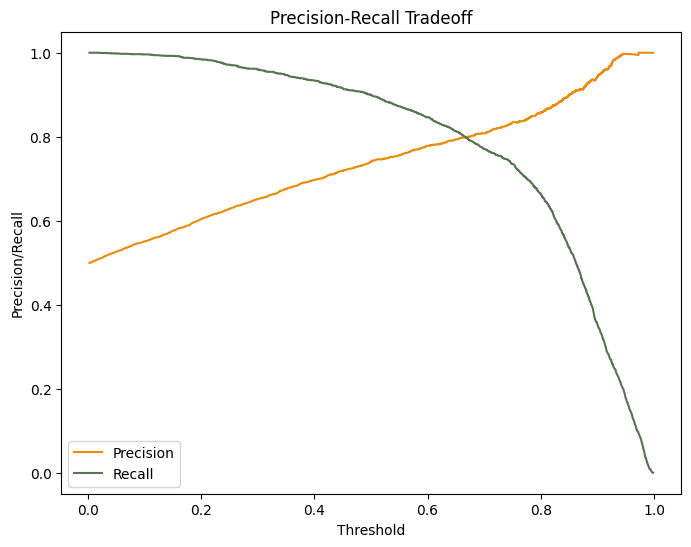

In [ ]:
# Precision-Recall Curve
y_probs_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs_xgb)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], color= "#e98c0e", label="Precision")
plt.plot(thresholds, recalls[:-1], color = "#577550", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Tradeoff")
plt.legend(loc="best")
plt.show()

Observing the precision-recall tradeoff, it may be better to keep the threshold at 0.5 to ensure that precision is maintained while recall is still quite high. If we wanted to completely balance both aspects, a threshold around 0.65 could be considered. However, our model prioritizes recall, so the threshold will not shift from the default.

#### Feature Importance and Visualizations

In [ ]:
# Feature importance
feature_importances_xgb = pd.Series(best_xgb.feature_importances_, index=features)
print("\nXGBoost Feature Importances:")
print(feature_importances_xgb.sort_values(ascending=False))


XGBoost Feature Importances:
SEASON                   0.342319
DAY_OF_YEAR              0.184504
MIN_TEMP                 0.143125
LAGGED_PRECIPITATION     0.131406
TEMP_RANGE               0.073912
AVG_WIND_SPEED           0.047055
PRECIPITATION            0.035013
LAGGED_AVG_WIND_SPEED    0.026224
MONTH                    0.016442
dtype: float32


SHAP (SHapley Additive exPlanations) is a method used to interpret machine learning models by breaking down how each feature contributes to a model’s predictions.

In terms of feature importance in the XGB model:
* Positive SHAP Values indicate that a feature increases the likelihood of wildfire.
* Negative SHAP Values indicate that a feature decreases the likelihood of wildfire.
* SHAP Value Close to Zero indicates that a feature has little to no effect on the prediction.

In [ ]:
import shap

explainer_xgb = shap.Explainer(best_xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test_scaled)

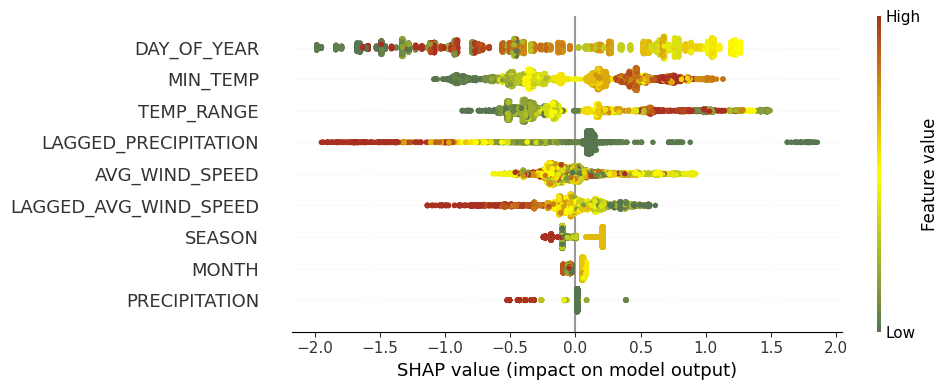

In [ ]:
# SHAP Summary Feature Analysis for XGBoost
shap.summary_plot(shap_values_xgb, X_test_scaled, feature_names=X_test_scaled.columns, plot_size=(10,4), cmap=cmap)

- DAY_OF_YEAR → The day of year impacts wildfire risk.
- MIN_TEMP → Lower minimum temperatures are associated with a reduced wildfire risk, while higher values significantly increase risk.
- TEMP_RANGE → A larger temperature range generally significantly increases fire risk, while lower temperature ranges decrease it.
- LAGGED_PRECIPITATION → More rainfall significantly reduces the risk of a fire, while less rainfall significantly increases risk of wildfire.
- LAGGED_AVG_WIND_SPEED → Higher past wind speeds slightly increase fire risk, likely due to drying effects.
- AVG_WIND_SPEED → High wind speeds push SHAP values higher, indicating that wind increases the spread and likelihood of wildfires.

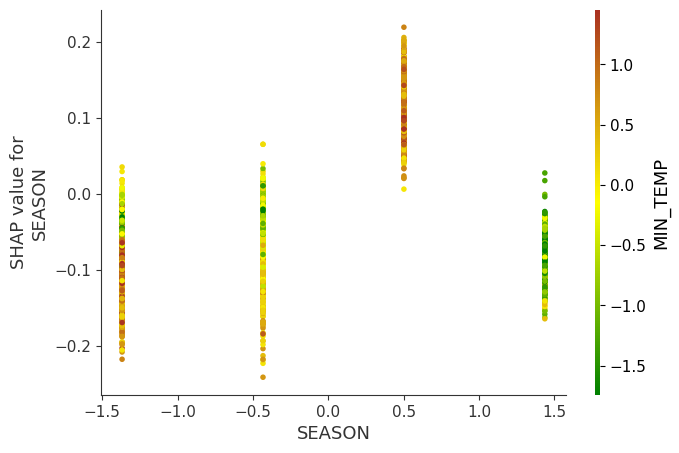

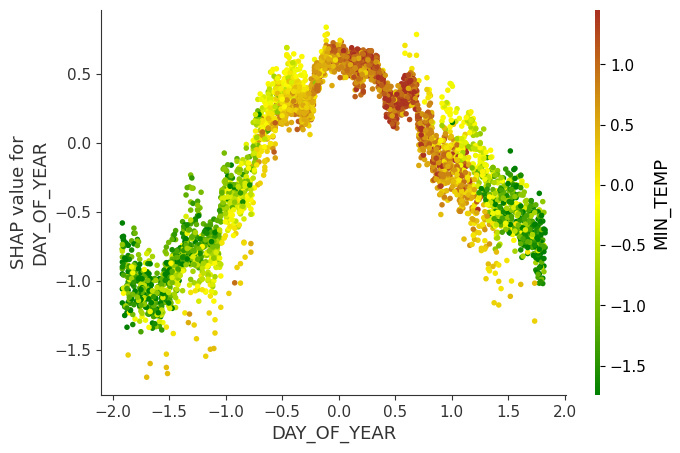

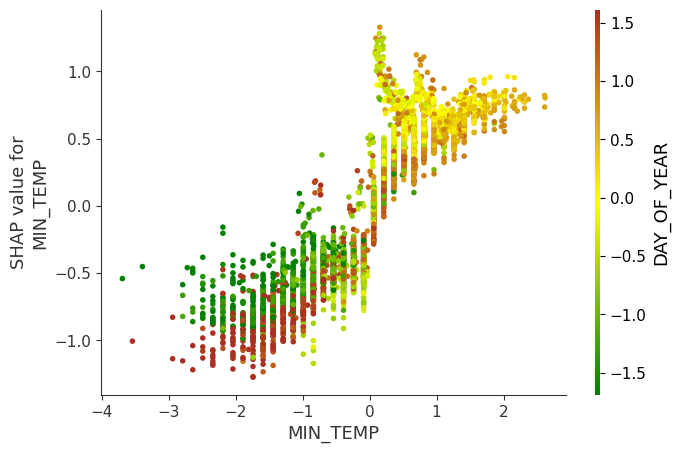

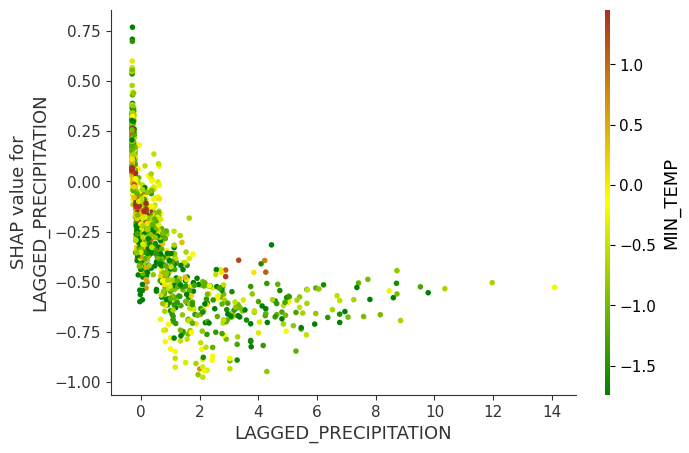

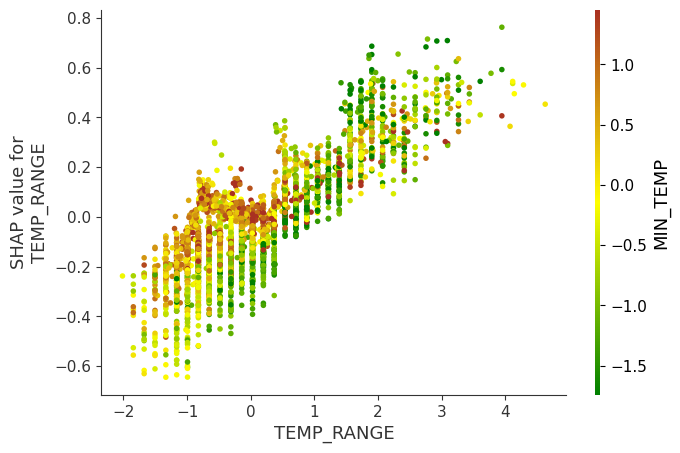

In [ ]:
# SHAP Dependence Plots for XGBoost
colors = ["green", "yellow", "#a93021"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

for feature in feature_importances_xgb.sort_values(ascending=False).index[:5]:  # 5 most important features
    shap.dependence_plot(feature, shap_values_xgb, X_test_scaled, cmap=cmap)

The plots above show the relationships between two features, and the impact it has on the model's decision making at varying values.

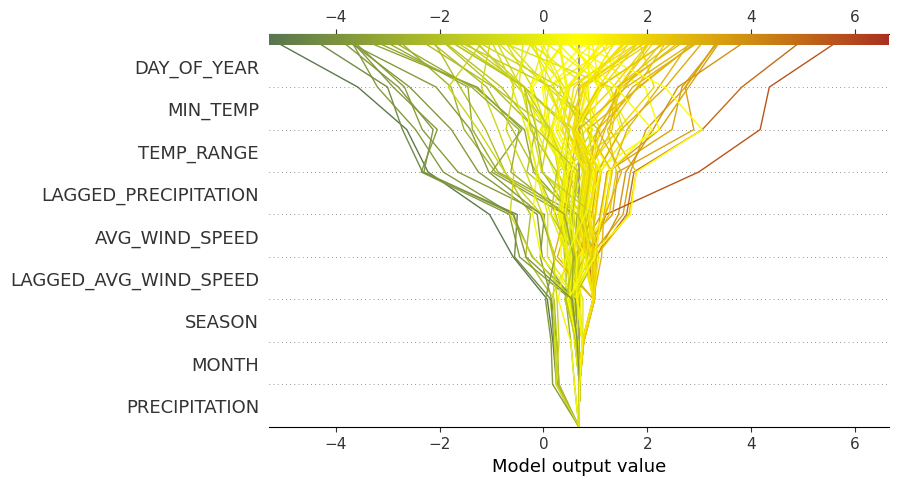

In [ ]:
# SHAP Decision Plot for XGBoost
colors = ["#577550", "yellow", "#a93021"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

shap.decision_plot(explainer_xgb.expected_value, shap_values_xgb[:100], X_test_scaled.iloc[:100], plot_color=cmap)

The decision plot above demonstrates the feature importance for each feature, and shows how the top 5 features greatly impact the model's fire indicator classification.

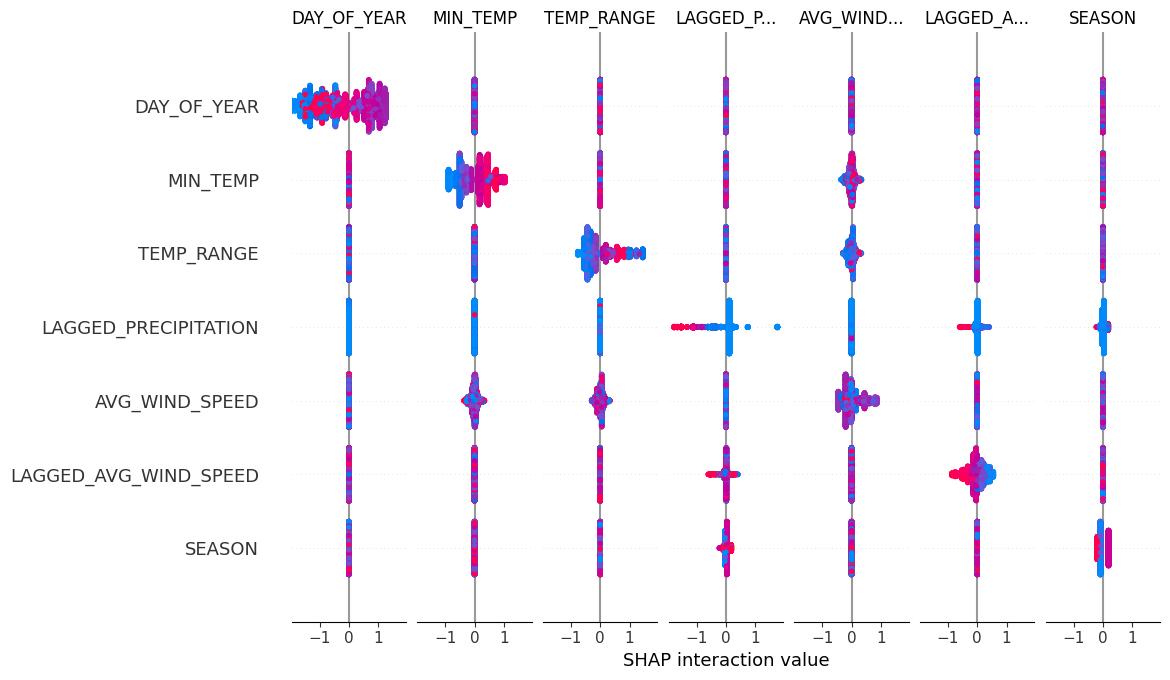

In [ ]:
# SHAP Interaction Values for XGBoost
shap_interaction_values_xgb = explainer_xgb.shap_interaction_values(X_test_scaled)
shap.summary_plot(shap_interaction_values_xgb, X_test_scaled, feature_names=X_test_scaled.columns, plot_size=(8,8), cmap=cmap)

This interaction plot is used to visualize how features have interacted with each other when a subset of feature interactions was introduced to the model. From the plot, minimal to moderate interaction is observed between some of the features, which is used to improve the model's performance in classifiying fire occurrences.